<a href="https://colab.research.google.com/github/michalMalujdy/machine-learning-colab/blob/master/multiclass_single_label_classification_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)



---



In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



---



In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)



---



In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



---



In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])



---



In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]



---



In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 231us/step - loss: 3.8118 - acc: 0.0680 - val_loss: 3.7977 - val_acc: 0.0590
Epoch 2/20
7982/7982 [==============================] - 1s 81us/step - loss: 3.7880 - acc: 0.1054 - val_loss: 3.7768 - val_acc: 0.2230
Epoch 3/20
7982/7982 [==============================] - 1s 101us/step - loss: 3.7675 - acc: 0.2164 - val_loss: 3.7569 - val_acc: 0.2230
Epoch 4/20
7982/7982 [==============================] - 1s 125us/step - loss: 3.7476 - acc: 0.2164 - val_loss: 3.7371 - val_acc: 0.2230
Epoch 5/20
7982/7982 [==============================] - 1s 113us/step - loss: 3.7279 - acc: 0.2313 - val_loss: 3.7176 - val_acc: 0.2230
Epoch 6/20
7982/7982 [==============================] - 1s 82us/step - loss: 3.7084 - acc: 0.2245 - val_loss: 3.6981 - val_acc: 0.3540
Epoch 7/20
7982/7982 [==============================] - 1s 88us/step - loss: 3.6889 - acc: 0.2278 - val_loss: 3.6788 - val_acc: 0.3540
Epo

7982/7982 [==============================] - 1s 102us/step - loss: 3.5939 - acc: 0.3514 - val_loss: 3.5845 - val_acc: 0.3540
Epoch 13/20
7982/7982 [==============================] - 1s 100us/step - loss: 3.5754 - acc: 0.3514 - val_loss: 3.5661 - val_acc: 0.3540
Epoch 14/20
7982/7982 [==============================] - 1s 77us/step - loss: 3.5570 - acc: 0.3409 - val_loss: 3.5479 - val_acc: 0.3540
Epoch 15/20
7982/7982 [==============================] - 1s 78us/step - loss: 3.5388 - acc: 0.3406 - val_loss: 3.5298 - val_acc: 0.3540
Epoch 16/20
7982/7982 [==============================] - 1s 76us/step - loss: 3.5207 - acc: 0.3514 - val_loss: 3.5117 - val_acc: 0.3540
Epoch 17/20
7982/7982 [==============================] - 1s 82us/step - loss: 3.5028 - acc: 0.3514 - val_loss: 3.4939 - val_acc: 0.3540
Epoch 18/20
7982/7982 [==============================] - 1s 81us/step - loss: 3.4850 - acc: 0.3514 - val_loss: 3.4762 - val_acc: 0.3540
Epoch 19/20
7982/7982 [==============================] - 1



---



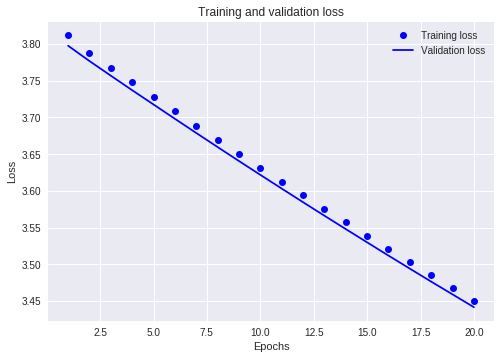

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



---

